In [1]:
%cd /Users/anseon-yeong/수업/2021-2/텍스트정보처리/프로젝트

/Users/anseon-yeong/수업/2021-2/텍스트정보처리/프로젝트


In [2]:
%cd Mecab-ko-for-Google-Colab

/Users/anseon-yeong/수업/2021-2/텍스트정보처리/프로젝트/Mecab-ko-for-Google-Colab


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from konlpy.tag import Mecab
#from eunjeon import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from numpy import nan

/opt/anaconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [91]:
%cd ..

/Users/anseon-yeong/수업/2021-2/텍스트정보처리/프로젝트


In [92]:
import pandas as pd
total_data = pd.read_excel(io='total_data2.xlsx')

In [93]:
print('전체 리뷰 개수  : ', len(total_data))

전체 리뷰 개수  :  453527


In [94]:
train_data, val_data = train_test_split(total_data, test_size = 0.2, random_state = 11)
train_data.shape, val_data.shape

((362821, 3), (90706, 3))

In [95]:
train_data

,reviews,label,tokenized
304288,본점,1,['본점']
29972,박스포장으로 찌그러지지않게 잘 받았구요 쓰던 티슈가 남아있어서 아직 사용 전 입니다...,1,"['박스', '포장', '으로', '찌그러지', '지', '않', '잘', '받',..."
215350,언리얼 엔진이라는 훌륭한 엔진을 가지고도 정지화면만 보여주는 이 게임에 절망했다!,0,"['언리얼', '엔진', '라는', '훌륭', '엔진', '가지', '정지', '화..."
140200,재구매 늘잘이용하고있습니다 감사합니다^^ 번창하세요!,1,"['재', '구매', '늘', '잘', '이용', '있', '습니다', '감사', ..."
440650,비디오방 시절의 영화 내용은 없다 그냥 벗는거다,0,"['비디오방', '시절', '내용', '없', '그냥', '벗', '거']"
...,...,...,...
359761,파병다녀오신분들이라면 매우재미있게 봤을거라 생각합니다저는 년 이라크 아르빌 자이툰 ...,0,"['파병', '다녀오', '신', '분', '라면', '매우', '재미있', '봤'..."
203867,나.는.살아있다.,0,"['나', '살', '아', '있']"
283728,그냥 크게 대단히 재밌지도 않고 적당히 재밌는 턴제 RPG임. 어려운건 없는데 확률...,0,"['그냥', '크', '대단히', '재밌', '지', '않', '적당히', '재밌'..."
298687,외계인과함꼐하는재미있는레인저총놀이,0,"['외계인', '함꼐', '재미', '있', '레인저', '총', '놀이']"


In [96]:
pwd

'/Users/anseon-yeong/수업/2021-2/텍스트정보처리/프로젝트'

In [135]:
%cd Mecab-ko-for-Google-Colab

[Errno 2] No such file or directory: 'Mecab-ko-for-Google-Colab'
/Users/anseon-yeong/수업/2021-2/텍스트정보처리/프로젝트/Mecab-ko-for-Google-Colab


In [136]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_val = val_data['tokenized'].values
y_val = val_data['label'].values

In [137]:
#단어 집합 생성
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [138]:
#등장 횟수가 1회인 단어들은 제거
threshold = 2

total_cnt = len(tokenizer.word_index)#총 단어수
rare_cnt = 0 # 등장 횟수가 1회인 단어 카운트

for key, value in tokenizer.word_counts.items():
    
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        
print('단어 집합(vocabulary)의 크기 : ',total_cnt)


단어 집합(vocabulary)의 크기 :  83244


In [139]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 46896


In [140]:
tokenzier = Tokenizer(vocab_size, oov_token = 'OOV')
tokenzier.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

In [103]:
import pickle 

with open('/Users/anseon-yeong/수업/2021-2/텍스트정보처리/프로젝트/tokenizer1218.bin','wb') as f:
    pickle.dump(tokenizer, f)

In [104]:
%cd ..

/Users/anseon-yeong/수업/2021-2/텍스트정보처리/프로젝트


In [105]:
print(X_train[0])
print(X_val[0])

[16265]
[74, 557, 2, 7, 32, 63, 6, 57, 401, 150]


리뷰의 최대 길이 :  104
리뷰의 평균 길이 : 15.282238348937906


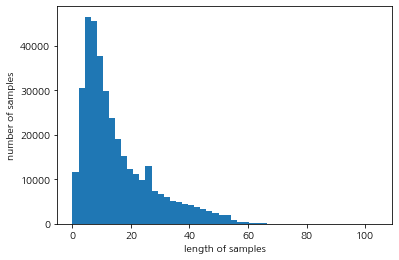

In [106]:
#패딩을 위해 최대 길이와 길이 분포 확인

print('리뷰의 최대 길이 : ', max(len(l) for l in X_train))
print('리뷰의 평균 길이 :' , sum(map(len, X_train))/len(X_train))

plt.hist([len(s) for s in X_train], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [107]:
#최대 길이 80으로 패딩

max_len = 80
X_train = pad_sequences(X_train, maxlen = max_len)
X_val = pad_sequences(X_val, maxlen = max_len)

print(X_train.shape)
print(X_val.shape)

(362821, 80)
(90706, 80)


In [108]:
print(X_train[0])
print(X_val[0])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0 16265]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  74 557
   2   7  32  63   6  57 401 150]


In [109]:
from tensorflow.keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Activation, Bidirectional
from tensorflow.keras.models import Sequential
from keras.layers.embeddings import Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [110]:
#모델2 Simple LSTM

model_ = Sequential()

#model_.add(Embedding(vocab_size,80))
model_.add(Embedding(362821,80))

model_.add(LSTM(64, input_shape=(80,)))
model_.add(Dropout(0.5))
model_.add(Dense(1,activation='sigmoid'))

model_.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')
model_.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 80)          29025680  
                                                                 
 lstm (LSTM)                 (None, 64)                37120     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 29,062,865
Trainable params: 29,062,865
Non-trainable params: 0
_________________________________________________________________


In [111]:
history_ = model_.fit(X_train, y_train, epochs = 5,batch_size=64,validation_split=0.2)

Epoch 1/5
4536/4536 [==============================] - 387s 85ms/step - loss: 0.1738 - accuracy: 0.9362 - val_loss: 0.1542 - val_accuracy: 0.9442
Epoch 2/5
4536/4536 [==============================] - 381s 84ms/step - loss: 0.1425 - accuracy: 0.9495 - val_loss: 0.1377 - val_accuracy: 0.9506
Epoch 3/5
4536/4536 [==============================] - 382s 84ms/step - loss: 0.1294 - accuracy: 0.9550 - val_loss: 0.1335 - val_accuracy: 0.9533
Epoch 4/5
4536/4536 [==============================] - 384s 85ms/step - loss: 0.1201 - accuracy: 0.9589 - val_loss: 0.1273 - val_accuracy: 0.9546
Epoch 5/5
4536/4536 [==============================] - 384s 85ms/step - loss: 0.1139 - accuracy: 0.9612 - val_loss: 0.1262 - val_accuracy: 0.9551


In [112]:
print("\n 테스트 정확도 : %4f"%(model_.evaluate(X_val,y_val)[1]))

2835/2835 [==============================] - 15s 5ms/step - loss: 0.1236 - accuracy: 0.9568

 테스트 정확도 : 0.956806


In [113]:
model_.save('best_model_916.h5')#학습 모델 저장

In [114]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_pred = model_.predict(X_val)
y_pred = np.round(y_pred)
print("Accuracy score : ", accuracy_score(y_val,y_pred))
print(classification_report(y_val,y_pred))

Accuracy score :  0.9568055034948074
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     70171
           1       0.91      0.90      0.90     20535

    accuracy                           0.96     90706
   macro avg       0.94      0.94      0.94     90706
weighted avg       0.96      0.96      0.96     90706



In [155]:
%cd ..

/Users/anseon-yeong/수업/2021-2/텍스트정보처리/프로젝트


In [154]:
pwd

'/Users/anseon-yeong/수업/2021-2/텍스트정보처리/프로젝트/Mecab-ko-for-Google-Colab'

In [156]:
total_data = pd.read_csv('./ex50000data.csv')

In [157]:
print('전체 리뷰 개수 : ', len(total_data))

전체 리뷰 개수 :  40000


In [158]:
total_data

,Unnamed: 0,reviews,label
0,561489,아이가 태어났는데 뭔가 문제가 있을 수 있다고 들었어. 너무 불안하고 두려워.,0
1,21222,김명민밖에 몰랐는데 지금보니 배우들이 빵빵하네,1
2,477522,재밌는데 재미가없음,0
3,311758,버튼을 누르고 있어야 되는데 생각보다 아이가 누르기에는 힘이 드네요.,0
4,300142,유통기한은 그냥 표시 인가요 ? 청양맛 소세지 유통기한 되기 십일전에 상해 버리고 ...,0
...,...,...,...
39995,384295,저..아직 배송이안왔어요...어떻게 된거죠??일주일이 훨씬넘었는데...당황스럽네요....,0
39996,392585,샵에 가서 받았었는데 이거 구매하고 집에서 셀프로 하는데 넘나 좋으네요^^* 세트로...,1
39997,424582,정말 잘 만들었는데 한번 깨면 다시 하고 싶지는 않다. 반복 클리어를 좋아하지 않으...,1
39998,281614,모양이랑 바람세기등 맘에 드는데 두개 구매한것중 하나가 완충후 금방 꺼지더니 또 나...,0


In [159]:
total_data = total_data.drop(total_data.columns[0],axis='columns')
total_data

,reviews,label
0,아이가 태어났는데 뭔가 문제가 있을 수 있다고 들었어. 너무 불안하고 두려워.,0
1,김명민밖에 몰랐는데 지금보니 배우들이 빵빵하네,1
2,재밌는데 재미가없음,0
3,버튼을 누르고 있어야 되는데 생각보다 아이가 누르기에는 힘이 드네요.,0
4,유통기한은 그냥 표시 인가요 ? 청양맛 소세지 유통기한 되기 십일전에 상해 버리고 ...,0
...,...,...
39995,저..아직 배송이안왔어요...어떻게 된거죠??일주일이 훨씬넘었는데...당황스럽네요....,0
39996,샵에 가서 받았었는데 이거 구매하고 집에서 셀프로 하는데 넘나 좋으네요^^* 세트로...,1
39997,정말 잘 만들었는데 한번 깨면 다시 하고 싶지는 않다. 반복 클리어를 좋아하지 않으...,1
39998,모양이랑 바람세기등 맘에 드는데 두개 구매한것중 하나가 완충후 금방 꺼지더니 또 나...,0


In [160]:
total_data['reviews'] = total_data['reviews'].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ가-힣]","")
total_data['reviews'].replace('',np.nan, inplace=True)

In [161]:
%cd Mecab-ko-for-Google-Colab

/Users/anseon-yeong/수업/2021-2/텍스트정보처리/프로젝트/Mecab-ko-for-Google-Colab


In [162]:
mecab = Mecab()

#불용어 정의
stopwords = ['은','는','이','가','도','다','의','한','에','하','고','을','를','인','듯','과','와','네','들','게','임','.','!','영화','..']

In [163]:
total_data = total_data.dropna(axis=0)

In [164]:
total_data['tokenized'] = total_data['reviews'].apply(mecab.morphs)
total_data['tokenized'] = total_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

<ipython-input-164-4e85d4a76500>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data['tokenized'] = total_data['reviews'].apply(mecab.morphs)
<ipython-input-164-4e85d4a76500>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data['tokenized'] = total_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])


In [128]:
data = total_data['tokenized'].values

In [141]:
final_data = tokenizer.texts_to_sequences(data)

리뷰의 최대 길이 :  0
리뷰의 평균 길이 : 0.0


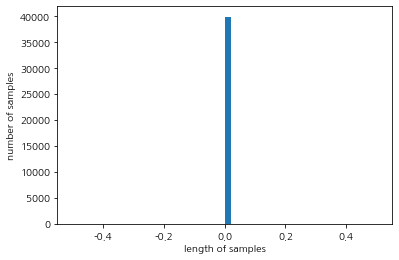

In [142]:
#패딩을 위해 최대 길이와 길이 분포 확인

print('리뷰의 최대 길이 : ', max(len(l) for l in final_data))
print('리뷰의 평균 길이 :' , sum(map(len, final_data))/len(final_data))

plt.hist([len(s) for s in final_data], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()